# Some "analysis" of articles published at https://www.england.nhs.uk/news/

In [1]:
from datetime import datetime
print('Notebook was last run:', datetime.now())

Notebook was last run: 2019-07-02 09:39:58.860895


## Setup

In [2]:
# Set up matplotlib to plot figures in the notebook

%matplotlib inline

In [3]:
# Configure how figures are displayed

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

In [4]:
# Import other useful modules

from collections import Counter
import csv

In [5]:
# Load the data

import config

with open(config.CSV_PATH) as f:
    records = list(csv.DictReader(f))

## The five most recent articles

In [6]:
for record in sorted(records, key=lambda record: record['pubdate'], reverse=True)[:5]:
    print(record['pubdate'], record['title'])

2019-07-01 New ways of working to free up doctors as part of the NHS Long Term Plan
2019-07-01 Heat-health watch alert: level 1 – summer preparedness
2019-06-29 Fake news putting 50,000 lesbian, gay and bisexual women at risk of cancer
2019-06-28 NHS’ top nurse urges public to enjoy sun safely this weekend
2019-06-26 Heat-health watch alert: level 2 – alert and readiness


## The ten most common tags

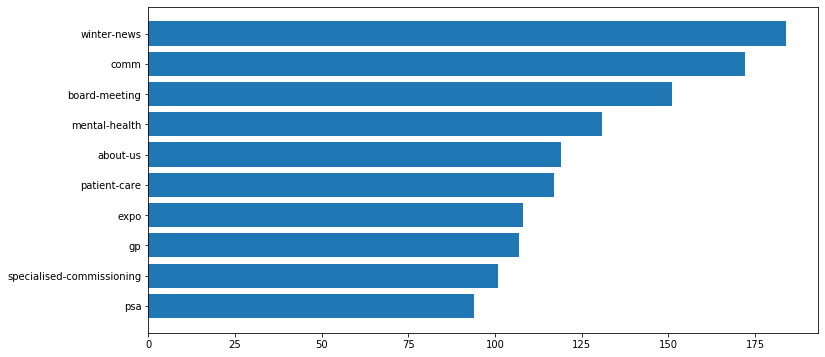

In [7]:
num_records_by_tag = Counter()

for record in records:
    for tag in record['tags'].split(','):
        num_records_by_tag[tag] += 1

labels = []
values = []

for tag, count in reversed(num_records_by_tag.most_common(10)):
    labels.append(tag)
    values.append(count)

plt.barh(labels, values);

## Number of articles about summer and winter, over time

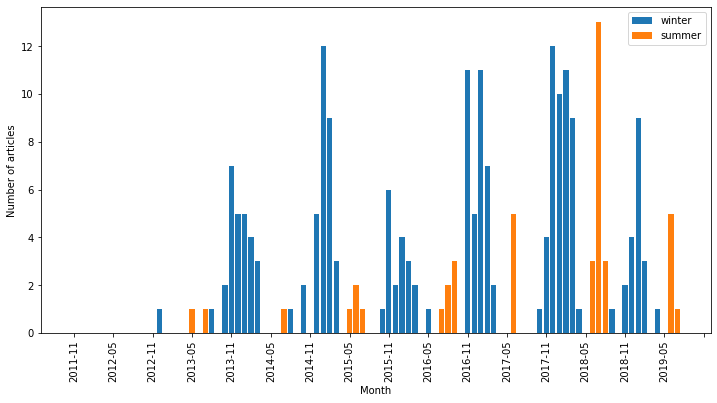

In [8]:
months = sorted(set(record['pubdate'][:7] for record in records))
num_winter_records_by_month = Counter()
num_summer_records_by_month = Counter()

for record in records:
    month = record['pubdate'][:7]
    tags = record['tags'].split(',')
    if 'winter-news' in tags:
        num_winter_records_by_month[month] += 1
    if 'heat-alert' in tags:
        num_summer_records_by_month[month] += 1

winter_values = []
summer_values = []

for month in months:
    winter_values.append(num_winter_records_by_month[month])
    summer_values.append(num_summer_records_by_month[month])
    
fig, ax = plt.subplots()
ax.bar(months, winter_values, label='winter')
ax.bar(months, summer_values, label='summer')
ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Month')
ax.set_ylabel('Number of articles')
ax.legend();